<a href="https://www.kaggle.com/sainathd/stellar-classification?scriptVersionId=85635043" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stellar-classification-dataset-sdss17/star_classification.csv


In [2]:
df = pd.read_csv('/kaggle/input/stellar-classification-dataset-sdss17/star_classification.csv')
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [3]:
df.shape

(100000, 18)

In [4]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [5]:
df.isna().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [6]:
df.dtypes

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

In [7]:
df['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [8]:
df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [9]:
odd = df.loc[df['u'] == -9999]
odd

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
79543,1.237649e+18,224.006526,-0.624304,-9999.0,-9999.0,18.1656,18.01675,-9999.0,752,301,2,537,3.731277e+18,STAR,0.000089,3314,54970,162


In [10]:
odd2 = df.loc[df['g'] == -9999]
odd2

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
79543,1.237649e+18,224.006526,-0.624304,-9999.0,-9999.0,18.1656,18.01675,-9999.0,752,301,2,537,3.731277e+18,STAR,0.000089,3314,54970,162


In [11]:
odd3 = df.loc[df['z'] == -9999]
odd3

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
79543,1.237649e+18,224.006526,-0.624304,-9999.0,-9999.0,18.1656,18.01675,-9999.0,752,301,2,537,3.731277e+18,STAR,0.000089,3314,54970,162


In [12]:
df = df.drop(df.index[79543], axis=0)
df.shape

(99999, 18)

In [13]:
df.loc[df['u'] == -9999]

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID


In [14]:
df = df.reset_index(drop=True)

In [15]:
df['rerun_ID'].unique()

array([301])

In [16]:
df = df.drop(columns = ['rerun_ID'],axis=1)

In [17]:
df_else = df.sample(frac=0.9, random_state=25)
df_test = df.drop(df_else.index)

In [18]:
print(df_else.shape)
print(df_test.shape)

(89999, 17)
(10000, 17)


In [19]:
df_train = df_else.sample(frac=0.8, random_state = 20)
df_val = df_else.drop(df_train.index)

In [20]:
print(df_train.shape)
print(df_val.shape)

(71999, 17)
(18000, 17)


In [21]:
t = {'GALAXY':0,'QSO':1,'STAR':2}

In [22]:
df_train['class_enc'] = df_train['class'].map(t)
df_val['class_enc'] = df_val['class'].map(t)
df_train.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID,class_enc
99065,1.237661e+18,226.339335,39.083512,23.00129,20.39655,18.74937,18.07508,17.65329,3699,3,227,1.574036e+18,GALAXY,0.284505,1398,53146,101,0
87964,1.237662e+18,176.030222,42.271812,25.90236,23.52246,21.42230,20.30071,19.50847,3840,4,131,9.422931e+18,GALAXY,0.674011,8369,57451,999,0
99877,1.237663e+18,241.108038,57.755768,18.84881,18.54406,18.69899,18.49950,18.32136,4011,5,52,7.640444e+18,QSO,0.473462,6786,56448,316,1
27689,1.237666e+18,247.071778,51.913554,23.63455,25.06550,22.01961,20.66394,19.96680,4679,3,102,9.072670e+18,GALAXY,0.747011,8058,57196,613,0
90151,1.237665e+18,191.465976,34.474234,19.05091,17.50399,16.60421,16.13665,15.83686,4576,3,484,2.237282e+18,GALAXY,0.063838,1987,53765,433,0


In [23]:
df_train = df_train.drop(['class'],axis=1)
df_val = df_val.drop(['class'], axis=1)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [24]:
df_val.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class_enc
0,1.237668e+18,172.427892,18.790452,24.64223,22.25799,21.90783,21.04677,20.68865,5313,2,87,6.619268e+18,0.000381,5879,56047,372,2
1,1.237663e+18,331.238887,0.201204,22.90914,21.54735,21.17424,20.81643,20.60504,4192,4,164,1.032006e+19,3.176916,9166,58051,205,1
2,1.237658e+18,141.637279,42.088899,25.03010,23.79241,21.48902,20.47543,19.81643,2830,1,215,9.342972e+18,0.595731,8298,57390,927,0
3,1.237668e+18,84.873591,-2.153757,21.72150,21.17631,19.22806,18.42299,17.82802,5181,6,89,8.172984e+18,0.277057,7259,56603,278,0
4,1.237679e+18,321.649375,2.096375,21.25759,20.10503,20.81921,20.29224,19.06567,7712,4,73,1.031569e+19,0.219943,9162,58040,702,0


In [25]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000
mean,1.237665e+18,177.628653,24.135552,22.080679,20.631583,19.645777,19.084865,18.768988,4481.403354,3.511625,186.127011,5.783903e+18,0.576667,5137.027890,55588.653687,449.315613
std,8.438450e+12,96.502612,19.644608,2.251068,2.037384,1.854763,1.757900,1.765982,1964.739021,1.586913,149.007687,3.324026e+18,0.730709,2952.312485,1808.492217,272.498252
min,1.237646e+18,0.005528,-18.785328,10.996230,10.498200,9.822070,9.469903,9.612333,109.000000,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.517698,5.147477,20.352410,18.965240,18.135795,17.732280,17.460830,3187.000000,2.000000,82.000000,2.844137e+18,0.054522,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900527,23.646462,22.179140,21.099930,20.125310,19.405150,19.004600,4188.000000,4.000000,146.000000,5.614896e+18,0.424176,4987.000000,55869.000000,433.000000
75%,1.237668e+18,233.895005,39.901582,23.687480,22.123775,21.044790,20.396510,19.921120,5326.000000,5.000000,241.000000,8.332365e+18,0.704172,7400.500000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


#### Since each row is not an event of occurence but an observational fact, lets not handle outilers using statistical methods. By the way we removed the obvious outlier where u,g and z are -9999.

In [26]:
# Feature Selection
# Numerical input and Classification output
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X = df_train.drop(['class_enc'],axis=1)
y = df_train[['class_enc']]

fs = f_classif(X,y)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [27]:
fs

(array([9.41410908e+01, 1.45270428e+01, 1.55686677e+02, 3.07533466e+03,
        2.72386152e+03, 3.37861887e+03, 6.03181912e+03, 7.37548891e+03,
        9.40820066e+01, 2.10681837e+01, 5.73119698e+01, 3.79358179e+03,
        5.96907772e+04, 3.79357492e+03, 3.23802454e+03, 3.27475006e+02]),
 array([1.47370782e-041, 4.92332106e-007, 3.40350021e-068, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        1.56316361e-041, 7.12656940e-010, 1.34747436e-025, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 2.64489250e-142]))

In [28]:
fs[0][1]

14.527042751808048

In [29]:
fs_df = pd.DataFrame(columns=['f_score','p_value'])

col = []
f_score = []
p_value = []
for i in range(len(df_train.columns)-1):
    col.append(df_train.columns[i])
    f_score.append(fs[0][i])
    p_value.append(fs[1][i])
    
fs_df['col'] = col
fs_df['f_score'] = f_score
fs_df['p_value'] = p_value
    

In [30]:
fs_df

,f_score,p_value,col
0,94.141091,1.473708e-41,obj_ID
1,14.527043,4.923321e-07,alpha
2,155.686677,3.403500e-68,delta
3,3075.334656,0.000000e+00,u
4,2723.861524,0.000000e+00,g
5,3378.618866,0.000000e+00,r
6,6031.819122,0.000000e+00,i
7,7375.488908,0.000000e+00,z
8,94.082007,1.563164e-41,run_ID
9,21.068184,7.126569e-10,cam_col


In [31]:
fs_df = fs_df.sort_values(by=['f_score'], ascending=False)
fs_df = fs_df.reset_index(drop=True)
fs_df

,f_score,p_value,col
0,59690.777219,0.000000e+00,redshift
1,7375.488908,0.000000e+00,z
2,6031.819122,0.000000e+00,i
3,3793.581787,0.000000e+00,spec_obj_ID
4,3793.574919,0.000000e+00,plate
5,3378.618866,0.000000e+00,r
6,3238.024539,0.000000e+00,MJD
7,3075.334656,0.000000e+00,u
8,2723.861524,0.000000e+00,g
9,327.475006,2.644892e-142,fiber_ID


In [32]:
fs_df.loc[fs_df['p_value'] <= 0.05]

,f_score,p_value,col
0,59690.777219,0.000000e+00,redshift
1,7375.488908,0.000000e+00,z
2,6031.819122,0.000000e+00,i
3,3793.581787,0.000000e+00,spec_obj_ID
4,3793.574919,0.000000e+00,plate
5,3378.618866,0.000000e+00,r
6,3238.024539,0.000000e+00,MJD
7,3075.334656,0.000000e+00,u
8,2723.861524,0.000000e+00,g
9,327.475006,2.644892e-142,fiber_ID


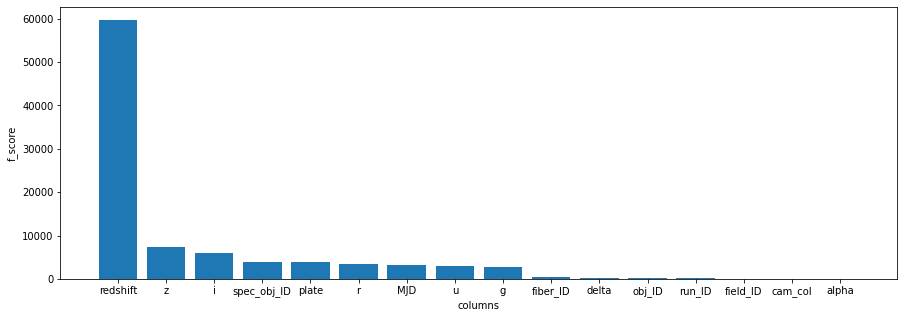

In [33]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,5))
plt.bar(fs_df['col'],fs_df['f_score'])
plt.xlabel('columns')
plt.ylabel('f_score')
plt.show()

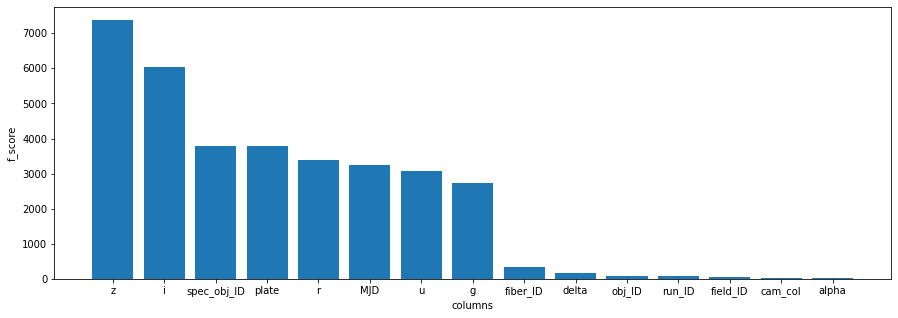

In [34]:
plt.figure(figsize=(15,5))
plt.bar(fs_df.loc[fs_df['f_score'] <10000]['col'], fs_df.loc[fs_df['f_score'] < 10000]['f_score'])
plt.xlabel('columns')
plt.ylabel('f_score')
plt.show()

In [35]:
fs_sel = []
for i in range(len(fs_df.loc[fs_df['f_score'] > 2000])):
    fs_sel.append(fs_df['col'][i])

fs_sel

['redshift', 'z', 'i', 'spec_obj_ID', 'plate', 'r', 'MJD', 'u', 'g']

In [36]:
fs_sel.append('class_enc')

In [37]:
df_test['class_enc'] = df_test['class'].map(t)
df_test = df_test.drop(columns=['class'],axis=1)

In [38]:
df_train = df_train[fs_sel]
df_test = df_test[fs_sel]
df_val = df_val[fs_sel]

In [39]:
df_val.shape

(18000, 10)

In [40]:
df_train['class_enc'].value_counts()

0    42793
2    15507
1    13699
Name: class_enc, dtype: int64

In [41]:
# since we are using cross val score and kfold, lets combine train and val datasets.
df_com = pd.concat([df_train,df_val])
df_com.shape

(89999, 10)

In [42]:
# Imbalanced dataset
from numpy import mean
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve

X = df_com.drop(['class_enc'],axis=1)
y = df_com['class_enc']

#X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=25)

def rrf(X,y):
    model = RandomForestClassifier(n_estimators=10)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=25)
    scores = cross_val_score(model, X,y, scoring = 'balanced_accuracy', cv=cv, n_jobs=-1)

    m = mean(scores)

    return m

def brf(X,y):
    model = BalancedRandomForestClassifier(n_estimators=10)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state = 25)
    scores  = cross_val_score(model, X,y, scoring = 'balanced_accuracy', cv=cv, n_jobs=-1)
    
    m = mean(scores)
    
    return m

def nb(X,y):
    model = GaussianNB()
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=25)
    scores = cross_val_score(model, X,y, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
    
    m = mean(scores)
    
    return m

def knc(X,y):
    model = KNeighborsClassifier()
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=25)
    scores = cross_val_score(model, X,y, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
    
    m = mean(scores)
    
    return m

def svc(X,y):
    model = SVC()
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=25)
    scores = cross_val_score(model, X,y, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
    
    m = mean(scores)
    
    return m

In [43]:
#print(rrf(X,y))

In [44]:
#print(brf(X,y))

In [45]:
#print(nb(X,y))

In [46]:
#print(knc(X,y))

In [47]:
# Running forever
#print(svc(X,y))

In [48]:
from sklearn.model_selection import RandomizedSearchCV

model = BalancedRandomForestClassifier()

param_grid = {
    'n_estimators': [3,10,30],
    'max_features': [3,6,9],
}

#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state = 25)

rnd_search_cv = RandomizedSearchCV(model, param_grid, n_iter=10, cv=3,return_train_score=True)
rnd_search_cv.fit(X,y)

#scores  = cross_val_score(model, X,y, scoring = 'balanced_accuracy', cv=cv, n_jobs=-1)
    
#m = mean(scores)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=3, estimator=BalancedRandomForestClassifier(),
                   param_distributions={'max_features': [3, 6, 9],
                                        'n_estimators': [3, 10, 30]},
                   return_train_score=True)

In [49]:
rnd_search_cv.best_params_

{'n_estimators': 30, 'max_features': 6}

In [50]:
rnd_search_cv.best_estimator_

BalancedRandomForestClassifier(max_features=6, n_estimators=30)

In [51]:
final_model = rnd_search_cv.best_estimator_

In [52]:
t1 = {0:'GALAXY',1:'QSO',2:'STAR'}
df_test = df_test.reset_index(drop=True)
df_test.head()

,redshift,z,i,spec_obj_ID,plate,r,MJD,u,g,class_enc
0,0.374756,17.98124,18.31696,5.529741e+17,491,18.96537,51942,22.13367,20.84772,0
1,0.662310,18.83176,19.08481,9.390322e+17,834,19.66170,52316,25.44243,20.77028,0
2,0.320806,18.49419,18.90489,1.427672e+18,1268,19.59078,52933,24.91692,21.27143,0
3,0.346654,17.73204,18.16925,1.427681e+18,1268,18.83662,52933,23.01294,20.46514,0
4,0.089251,16.97431,17.14015,1.567391e+18,1392,17.46046,52822,19.18550,18.02785,0


In [53]:
test_X = df_test.drop(columns=['class_enc'],axis=1)
test_y = df_test['class_enc']

#model.fit(X,y)
pred = final_model.predict(test_X)
pred

array([0, 0, 0, ..., 1, 1, 0])

In [54]:
df_test['pred'] = pred
df_test.head()

,redshift,z,i,spec_obj_ID,plate,r,MJD,u,g,class_enc,pred
0,0.374756,17.98124,18.31696,5.529741e+17,491,18.96537,51942,22.13367,20.84772,0,0
1,0.662310,18.83176,19.08481,9.390322e+17,834,19.66170,52316,25.44243,20.77028,0,0
2,0.320806,18.49419,18.90489,1.427672e+18,1268,19.59078,52933,24.91692,21.27143,0,0
3,0.346654,17.73204,18.16925,1.427681e+18,1268,18.83662,52933,23.01294,20.46514,0,0
4,0.089251,16.97431,17.14015,1.567391e+18,1392,17.46046,52822,19.18550,18.02785,0,0


In [55]:
accuracy_score(df_test['class_enc'],df_test['pred'])

0.9745

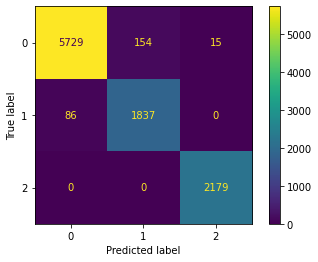

In [56]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(df_test['class_enc'],df_test['pred'],labels=final_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
disp.plot()
plt.show()

In [57]:
df_test['class_enc'] = df_test['class_enc'].map(t1)
df_test['pred'] = df_test['pred'].map(t1)
df_test.head()

,redshift,z,i,spec_obj_ID,plate,r,MJD,u,g,class_enc,pred
0,0.374756,17.98124,18.31696,5.529741e+17,491,18.96537,51942,22.13367,20.84772,GALAXY,GALAXY
1,0.662310,18.83176,19.08481,9.390322e+17,834,19.66170,52316,25.44243,20.77028,GALAXY,GALAXY
2,0.320806,18.49419,18.90489,1.427672e+18,1268,19.59078,52933,24.91692,21.27143,GALAXY,GALAXY
3,0.346654,17.73204,18.16925,1.427681e+18,1268,18.83662,52933,23.01294,20.46514,GALAXY,GALAXY
4,0.089251,16.97431,17.14015,1.567391e+18,1392,17.46046,52822,19.18550,18.02785,GALAXY,GALAXY
